###Generate LDA Topic Models





# 1. Use requests.get() to get the raw HTML data and to extract the text from those article

In [0]:
!pip install newspaper3k
import pandas as pd
import numpy as np
import newspaper
import requests
from newspaper import fulltext
from newspaper import Article
from google.colab import drive
drive.mount('/content/drive')
texts = pd.read_csv(open('drive/My Drive/Colab Notebooks/salesforce.2018.csv','rb'),header=None)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
texts.head()

,0
0,https://www.openpr.com/news/896968/mobile-appl...
1,https://www.itbusiness.ca/news/why-moneris-cmo...
2,https://www.computerdealernews.com/news/why-mo...
3,https://www.openpr.com/news/906129/email-marke...
4,https://www.openpr.com/news/905900/crm-analyti...


In [0]:
#convert into list 
list=texts[0].tolist()
list

['https://www.openpr.com/news/896968/mobile-application-development-platform-market-rising-demand-among-enterprises-for-mobile-apps-and-rising-adoption-of-bring-your-own-device.html',
 'https://www.itbusiness.ca/news/why-moneris-cmo-jeff-guthrie-believes-tech-wont-replace-salespeople/98391',
 'https://www.computerdealernews.com/news/why-moneris-cmo-jeff-guthrie-believes-tech-wont-replace-salespeople/58221',
 'https://www.openpr.com/news/906129/email-marketing-industry-to-expanding-at-a-healthy-cagr-of-19-60-between-2017-and-2025.html',
 'https://www.openpr.com/news/905900/crm-analytics-market-2018-received-rapid-boost-in-global-industry-by-forecast-to-2023.html',
 'http://utahherald.com/hudson-bay-capital-management-lp-has-upped-its-salesforce-crm-holding-16-analysts-are-bullish-jazz-pharmaceuticals-public-limited-company-jazz-last-week/',
 'https://www.prnewswire.com/news-releases/the-global-digital-marketing-software-market-size-is-expected-to-reach-774-billion-by-2023-rising-at-a-ma

In [0]:
articles =[]
for i in range(len(list)):
    a = Article(list[i])
    try:
      a.download()
      a.parse() 
      articles.append(list[i])
    except:
      pass

In [0]:
len(articles)

42

# 2. Use newspapers.fulltext() to extract the text from those article

In [0]:
!pip install newspaper3k

In [0]:
import newspaper
texts =[]
for i in range(len(articles)):
  article = Article(articles[i])
  article.download()
  article.parse()
  texts.append(article.text)

In [0]:
type(texts)

list

In [0]:
#convert into dictionary 
del dict
dict_= dict(zip(range(len(texts)), texts))
dict_

{0: 'Jeff Guthrie knows technology is changing how sales are conducted – he just doesn’t believe it can replace human salespeople entirely, or even more than a small fraction.\n\nAs CMO of Canada’s largest payments processor, Moneris Solutions, Guthrie has certainly seen his share of technology-driven changes in the sales profession – especially those powered by artificial intelligence (AI), which Moneris has used to analyze past customers and compare them with current prospects to identify the merchants most likely to use its products – but ultimately subscribes to a theory akin to an insight that IBM chair and CEO Ginni Rometty discussed at Salesforce Inc.’s Dreamforce conference last November: That only 10 per cent of jobs will disappear as a result of the current AI revolution, but 100 per cent will change.\n\n“Humans cannot interpret sales history the way a machine can interpret sales history,” Guthrie told ITBusiness.ca during the Future of Sales in Canada, an event held by the C

# 3. Use Tmtoolkit to generate topic models.

In [0]:
!pip install tmtoolkit

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

     |████████████████████████████████| 19.9MB 28.3MB/s 
     |████████████████████████████████| 2.3MB 32.5MB/s 
     |████████████████████████████████| 112kB 42.4MB/s 
     |████████████████████████████████| 1.5MB 38.7MB/s 
     |████████████████████████████████| 3.0MB 40.8MB/s 
     |████████████████████████████████| 22.1MB 1.2MB/s 
  Created wheel for globre: filename=globre-0.1.5-cp36-none-any.whl size=19528 sha256=fecbe5ae643ade1d2a14c8192ceb35b884c25b7684f477a4c9a3677f710df285
  Stored in directory: /root/.cache/pip/wheels/c4/3f/7f/be546f6d880521a8a7a1fe84cbe135fa859be63084682d3292
  Created wheel for nltk: filename=nltk-3.4.5-cp36-none-any.whl size=1449907 sha256=905550ed9b103ece38075ebd14a77fef12a4023dc84d709a5706f84bec844940
  Stored in directory: /root/.cache/pip/wheels/96/86/f6/68ab24c23f207c0077381a5e3904b2815136b879538a24b483
Successfully built globre nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5
  Fou

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
import random
random.seed(20191120) #to make sampling reproducible
np.set_printoptions(precision=5)
from tmtoolkit.corpus import Corpus
corpus= Corpus()
#add into corpus 
for key in dict_:
   corpus.add_doc(str(key),dict_[key])

lda_params ={
    'n_topics':50,
    'eta':0.01,
    'n_iter':1000,
    'random_state':20191120
}

In [0]:
print(len(corpus))

42


(array([36.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([    0. ,  5026.7, 10053.4, 15080.1, 20106.8, 25133.5, 30160.2,
        35186.9, 40213.6, 45240.3, 50267. ]),
 <a list of 10 Patch objects>)

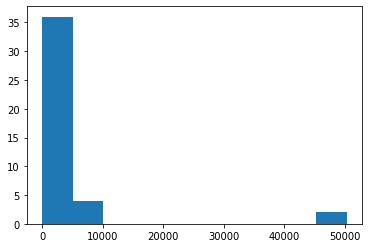

In [0]:
import matplotlib

matplotlib.pyplot.hist(corpus.doc_lengths.values())

In [0]:
from tmtoolkit.preprocess import TMPreproc

preproc= TMPreproc(corpus)
preproc.pos_tag()
preproc.lemmatize()
preproc.tokens_to_lowercase()
preproc.remove_special_chars_in_tokens()
preproc.add_stopwords(['http','nt'])

<TMPreproc [42 documents]>

In [0]:
corpus['20']

'We employ the use of cookies. Find out more.'

In [0]:
preproc.vocabulary_size

3465

In [0]:
preproc_smaller = preproc.copy()
preproc_smaller.filter_for_pos('N')
preproc_smaller.clean_tokens(remove_numbers=True, remove_shorter_than=2)
preproc_smaller.remove_common_tokens(df_threshold=0.8)
preproc_smaller.remove_uncommon_tokens(df_threshold=0.005)

print(preproc.vocabulary_size)
print(preproc_smaller.vocabulary_size)

3465
2189


In [0]:
print(preproc.tokens['20'])
print(preproc_smaller.tokens['20'])
print(preproc.tokens['1'])
print(preproc_smaller.tokens['1'])
print(preproc.tokens['5'])
print(preproc_smaller.tokens['5'])

['we', 'employ', 'the', 'use', 'of', 'cooky', '', 'find', 'out', 'more', '']
['use', 'cooky']
['3', 'min', 'read', 'jeff', 'guthrie', 'know', 'technology', 'be', 'change', 'how', 'sale', 'be', 'conduct', '–', 'he', 'just', 'doesn', '’', 't', 'believe', 'it', 'can', 'replace', 'human', 'salesperson', 'entirely', '', 'or', 'even', 'more', 'than', 'a', 'small', 'fraction', '', 'as', 'cmo', 'of', 'canada', '’', 's', 'large', 'payment', 'processor', '', 'moneris', 'solutions', '', 'guthrie', 'have', 'certainly', 'see', 'his', 'share', 'of', 'technologydriven', 'change', 'in', 'the', 'sale', 'profession', '–', 'especially', 'those', 'power', 'by', 'artificial', 'intelligence', '', 'ai', '', '', 'which', 'moneris', 'have', 'use', 'to', 'analyze', 'past', 'customer', 'and', 'compare', 'them', 'with', 'current', 'prospect', 'to', 'identify', 'the', 'merchant', 'most', 'likely', 'to', 'use', 'its', 'product', '–', 'but', 'ultimately', 'subscribes', 'to', 'a', 'theory', 'akin', 'to', 'an', 'insig

In [0]:
vocab_bg = np.array(preproc.vocabulary)
vocab_sm = np.array(preproc_smaller.vocabulary)

In [0]:
dtm_bg = preproc.dtm
dtm_sm = preproc_smaller.dtm #dtm means document term matix

dtm_bg, dtm_sm

(<42x3465 sparse matrix of type '<class 'numpy.int32'>'
 	with 11079 stored elements in Compressed Sparse Row format>,
 <42x2189 sparse matrix of type '<class 'numpy.int32'>'
 	with 5985 stored elements in Compressed Sparse Row format>)

In [0]:
!pip install tmtoolkit['lda']
import logging
import warnings
from tmtoolkit.topicmod.tm_lda import compute_models_parallel

logger= logging.getLogger('lda')
logger.addHandler(logging.NullHandler())
logger.propagate= False

warnings.filterwarnings('ignore')
#set data to use
dtms = {
    'bigger': dtm_bg,
    'smaller':dtm_sm
}

lda_params = {
    'n_topics':16,
    'eta': .001,
    'n_iter': 1000,
    'random_state':20191122
}

models = compute_models_parallel(dtms,constant_parameters=lda_params)

In [0]:
from tmtoolkit.topicmod.model_io import print_ldamodel_topic_words
model_sm = models['smaller'][0][1]
print_ldamodel_topic_words(model_sm.topic_word_, vocab_sm,top_n=3)

topic_1
> #1. firm (0.046422)
> #2. facebook (0.038132)
> #3. security (0.031501)
topic_2
> #1. year (0.050230)
> #2. us (0.035162)
> #3. mulesoft (0.030139)
topic_3
> #1. year (0.046553)
> #2. engineering (0.046553)
> #3. strategy (0.044437)
topic_4
> #1. sale (0.067807)
> #2. guthrie (0.027124)
> #3. ai (0.027124)
topic_5
> #1. role (0.053918)
> #2. team (0.036891)
> #3. microsoft (0.031216)
topic_6
> #1. america (0.072441)
> #2. fastbase (0.067008)
> #3. salesforce (0.059764)
topic_7
> #1. market (0.155984)
> #2. inc (0.046796)
> #3. report (0.044456)
topic_8
> #1. industry (0.095059)
> #2. growth (0.050326)
> #3. intelligence (0.043616)
topic_9
> #1. report (0.042679)
> #2. use (0.032010)
> #3. magazine (0.028454)
topic_10
> #1. technology (0.085962)
> #2. enterprise (0.061402)
> #3. position (0.038888)
topic_11
> #1. company (0.141530)
> #2. business (0.094353)
> #3. inc (0.077973)
topic_12
> #1. vice (0.081447)
> #2. university (0.067405)
> #3. tech (0.036511)
topic_13
> #1. cliq

In [0]:
model_bg = models['bigger'][0][1]
print_ldamodel_topic_words(model_bg.topic_word_, vocab_bg,top_n=3)

topic_1
> #1. salesforce (0.065021)
> #2. the (0.039961)
> #3. over (0.037929)
topic_2
> #1. it (0.044663)
> #2. ” (0.031670)
> #3. “ (0.028422)
topic_3
> #1. ’ (0.042249)
> #2. a (0.041351)
> #3. for (0.028766)
topic_4
> #1. in (0.108845)
> #2. a (0.079890)
> #3. the (0.069424)
topic_5
> #1.  (0.413512)
> #2. the (0.134732)
> #3. to (0.073278)
topic_6
> #1.  (0.165104)
> #2. software (0.048765)
> #3. marketing (0.046675)
topic_7
> #1. company (0.098403)
> #2. for (0.066422)
> #3. business (0.064946)
topic_8
> #1.  (0.233332)
> #2. and (0.149947)
> #3. the (0.041693)
topic_9
> #1.  (0.254103)
> #2. the (0.102039)
> #3. market (0.070235)
topic_10
> #1. and (0.068473)
> #2. clique (0.048051)
> #3. it (0.038441)
topic_11
> #1. and (0.108979)
> #2. of (0.108667)
> #3. in (0.084310)
topic_12
> #1. of (0.198676)
> #2. team (0.027983)
> #3. include (0.027284)
topic_13
> #1. of (0.135764)
> #2. at (0.099972)
> #3. more (0.054306)
topic_14
> #1. ’ (0.148192)
> #2. an (0.055027)
> #3. have (0.04

# Evaluation

In [0]:
const_params= {'n_iter':1000,'eta':0.1,'random_state':20191122}
del list 
ks=list(range(1,302,20))
print(ks)
varying_params= [dict(n_topics=k,alpha=1/k) for k in ks]
print(varying_params)

[1, 21, 41, 61, 81, 101, 121, 141, 161, 181, 201, 221, 241, 261, 281, 301]
[{'n_topics': 1, 'alpha': 1.0}, {'n_topics': 21, 'alpha': 0.047619047619047616}, {'n_topics': 41, 'alpha': 0.024390243902439025}, {'n_topics': 61, 'alpha': 0.01639344262295082}, {'n_topics': 81, 'alpha': 0.012345679012345678}, {'n_topics': 101, 'alpha': 0.009900990099009901}, {'n_topics': 121, 'alpha': 0.008264462809917356}, {'n_topics': 141, 'alpha': 0.0070921985815602835}, {'n_topics': 161, 'alpha': 0.006211180124223602}, {'n_topics': 181, 'alpha': 0.0055248618784530384}, {'n_topics': 201, 'alpha': 0.004975124378109453}, {'n_topics': 221, 'alpha': 0.004524886877828055}, {'n_topics': 241, 'alpha': 0.004149377593360996}, {'n_topics': 261, 'alpha': 0.0038314176245210726}, {'n_topics': 281, 'alpha': 0.0035587188612099642}, {'n_topics': 301, 'alpha': 0.0033222591362126247}]


In [0]:
from tmtoolkit.topicmod import tm_lda
eval_results= tm_lda.evaluate_topic_models(dtm_sm,
    varying_params,
    const_params)

In [0]:
from tmtoolkit.topicmod.evaluate import results_by_parameter
from tmtoolkit.topicmod.visualize import plot_eval_results

results_by_n_topics = results_by_parameter(eval_results, 'n_topics')
print(results_by_n_topics)

[(1, {'cao_juan_2009': nan, 'arun_2010': 10.313953566263448, 'coherence_mimno_2011': -0.9806733194957711}), (21, {'cao_juan_2009': 0.15629366249166074, 'arun_2010': 3.719609585222474, 'coherence_mimno_2011': -3.409648205156081}), (41, {'cao_juan_2009': 0.3830670760992964, 'arun_2010': 15.765926621178679, 'coherence_mimno_2011': -11.108602551816336}), (61, {'cao_juan_2009': 0.5458629200081929, 'arun_2010': 22.886212300593428, 'coherence_mimno_2011': -14.67488603202685}), (81, {'cao_juan_2009': 0.616359650035871, 'arun_2010': 33.80307257690988, 'coherence_mimno_2011': -16.16803867879934}), (101, {'cao_juan_2009': 0.696259547074063, 'arun_2010': 73.31916098575584, 'coherence_mimno_2011': -17.478686373198716}), (121, {'cao_juan_2009': 0.7359864086154081, 'arun_2010': 105.72933451707377, 'coherence_mimno_2011': -18.14845550750865}), (141, {'cao_juan_2009': 0.7628600617318403, 'arun_2010': 96.39854641858796, 'coherence_mimno_2011': -18.87689851716094}), (161, {'cao_juan_2009': 0.795179486509

(<Figure size 576x432 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa3a6c0d198>,
       dtype=object))

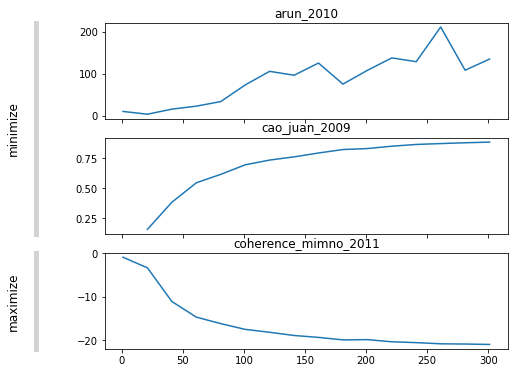

In [0]:
plot_eval_results(results_by_n_topics)

#Questions to Answer

###1. 42 out of 87 can be successfully fetched. 
###2. After creating topic models, I found that the content stories of salesforces in 2018 are related to three fields: leadership, technology development and marketing.
###3. In my mind, using the topic model method it did help me to extract the keywords more straightforward. I can easily by looking at the different topic number (topic 1, topic 2...etc) to get the bigger picture of the main content of salesforces in 2018.